
# Parametric Reliability Models using the `reliability` Python Package

This notebook demonstrates **parametric reliability models** using the [`reliability`](https://reliability.readthedocs.io/en/latest/index.html) package.

---


In [22]:
# Install if needed
# !pip install reliability

import numpy as np
import matplotlib.pyplot as plt
from reliability import Fitters as rf

# Example data
failures = [5, 7, 9, 12, 13, 13.5, 15, 16, 18, 20, 22, 25, 26, 27, 30, 32, 34, 37, 40, 45]
right_censored = [48, 50, 55]
print(f"Loaded data: {len(failures)} failures, {len(right_censored)} right-censored")


Loaded data: 20 failures, 3 right-censored


**Definition:** Right-censored data occurs when an event of interest has not happened by the end of an observation period, so its exact time is unknown but known to be after a certain point

***
## 📘 Exponential Reliability 

The **Exponential distribution** is the simplest reliability model and assumes a **constant failure rate** over time.  
It is often used to model the time between random, independent failures.

#### Parameters
- $\lambda$ = rate (or scale) parameter ($\lambda > 0$)  
- Limits: $t \ge 0$

#### 📈 Probability Density Function (PDF)
$
f(t) = \lambda e^{-\lambda t}
$

#### 📊 Cumulative Distribution Function (CDF)
$
F(t) = 1 - e^{-\lambda t}
$

#### 🧮 Survival Function (SF)
$
R(t) = e^{-\lambda t}
$

#### ⚙️ Hazard Function (HF)
$
h(t) = \lambda
$

#### 📉 Cumulative Hazard Function (CHF)
$
H(t) = \lambda t
$

#### 🧠 Interpretation
- The **failure rate is constant** ($h(t) = \lambda$), meaning the probability of failure does not depend on age.  
- The **mean time to failure (MTTF)** is given by $1/\lambda$.  
- Commonly used for **random failures** with no aging effect (e.g., electronic components, Poisson processes).

> Note: Some parameterizations (e.g., in `scipy.stats`) use the **mean** $1/\lambda$ instead of $\lambda$ as the scale parameter.

**Summary:** 

| Function | Meaning | Formula | Intuitive interpretation |
|:--|:--|:--|:--|
| **PDF** (Probability Density Function) | Describes the *instantaneous probability* of failure at exactly time $t$ | $f(t) = \lambda e^{-\lambda t}$ | “How dense the failures are” at each moment — the shape of the failure-time distribution |
| **CDF** (Cumulative Distribution Function) | Probability that failure has occurred *by or before* time $t$ | $F(t) = 1 - e^{-\lambda t}$ | “Fraction failing” — cumulative proportion of failed units up to time $t$ |
| **Hazard Function** (Failure Rate) | Instantaneous *rate of failure* given survival until $t$ | $h(t) = \dfrac{f(t)}{1 - F(t)} = \lambda$ | “Risk of failing in the next instant” if the item is still working at time $t$ |


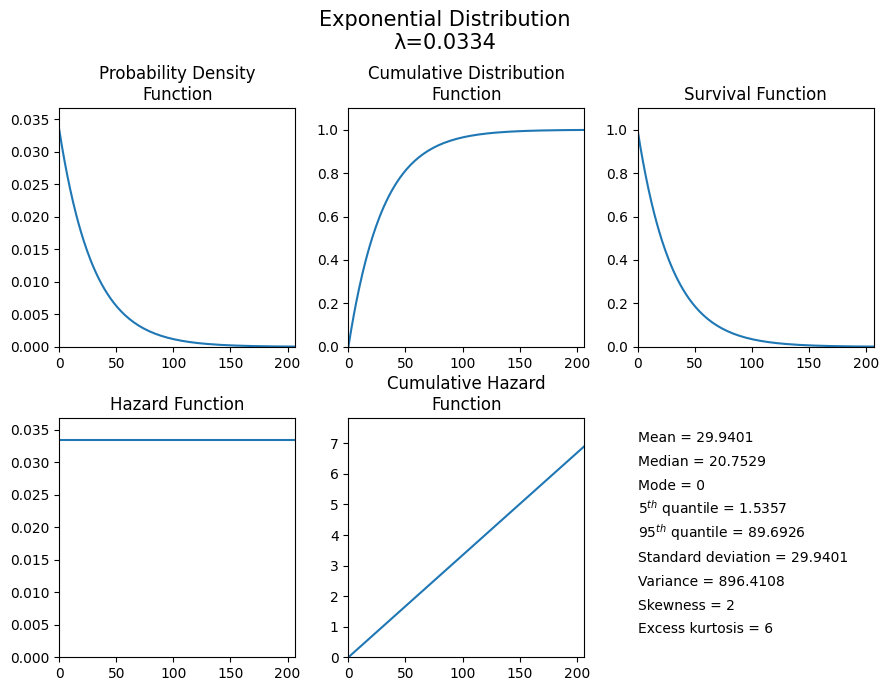

In [8]:
from reliability.Distributions import Exponential_Distribution

dist = Exponential_Distribution(Lambda=0.0334)  # this created the distribution object
# dist.PDF()  # this creates the plot of the PDF that gives likelihood of a continuous random variable taking on a specific value.
# plt.show()
dist.plot()

***
## 📘 Weibull (2-Parameter) Reliability Model

The **Weibull distribution** is one of the most widely used models in reliability engineering. It can represent different failure behaviors depending on its shape parameter.

#### Parameters
- $\alpha$ = scale parameter ($\alpha > 0$)  
- $\beta$ = shape parameter ($\beta > 0$)  
- Limits: $t \ge 0$

#### 📈 Probability Density Function (PDF)
$
f(t) = \frac{\beta t^{\beta - 1}}{\alpha^{\beta}} 
e^{-\left(\frac{t}{\alpha}\right)^{\beta}}
= \frac{\beta}{\alpha} 
\left(\frac{t}{\alpha}\right)^{\beta - 1}
e^{-\left(\frac{t}{\alpha}\right)^{\beta}}
$

#### 📊 Cumulative Distribution Function (CDF)
$
F(t) = 1 - e^{-\left(\frac{t}{\alpha}\right)^{\beta}}
$

#### 🧮 Survival Function (SF)
$
R(t) = e^{-\left(\frac{t}{\alpha}\right)^{\beta}}
$

#### ⚙️ Hazard Function (HF)
$
h(t) = \frac{\beta}{\alpha}
\left(\frac{t}{\alpha}\right)^{\beta - 1}
$

#### 📉 Cumulative Hazard Function (CHF)
$
H(t) = \left(\frac{t}{\alpha}\right)^{\beta}
$

#### 🧠 Interpretation
- For $\beta < 1$: **Decreasing failure rate** (infant mortality).  
- For $\beta = 1$: **Constant failure rate** (reduces to Exponential).  
- For $\beta > 1$: **Increasing failure rate** (aging or wear-out failures).  
- The **scale parameter** $\alpha$ stretches or compresses the distribution along the time axis.

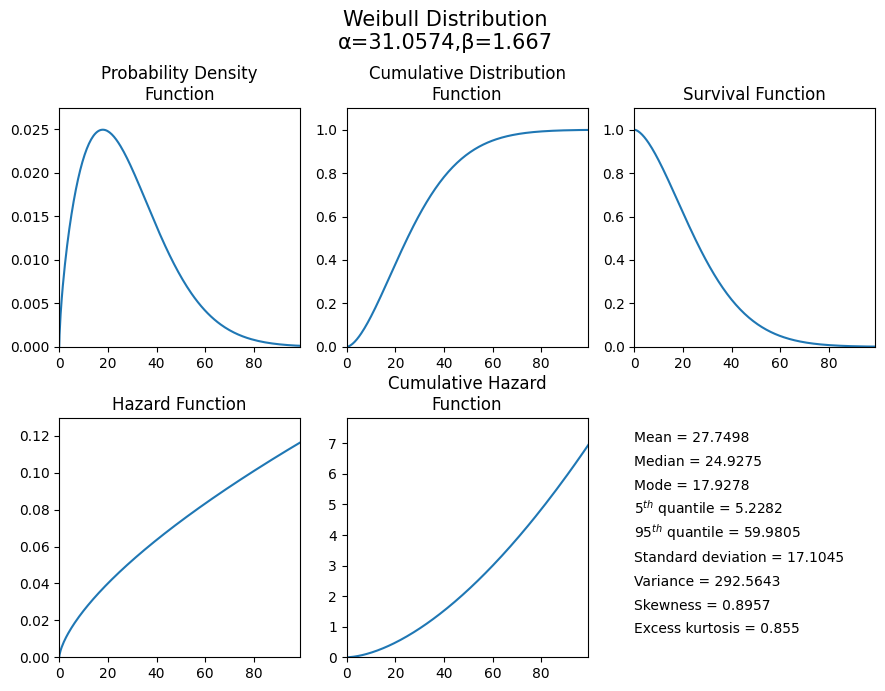

In [7]:
from reliability.Distributions import Weibull_Distribution

dist = Weibull_Distribution(alpha=31.0574 , beta=1.667) 
# dist.PDF() 
# plt.show()
dist.plot()

***
## 📘 Lognormal Reliability Model

The **Lognormal distribution** models random variables whose logarithm is normally distributed. It is commonly used in reliability analysis for lifetimes that cannot be negative and tend to have a right-skewed shape.

#### Parameters
- $\mu$ = scale parameter  ($-\infty < \mu < \infty$)  
- $\sigma$ = shape parameter  ($\sigma > 0$)  
- Limits: $t \ge 0$

#### 📈 Probability Density Function (PDF)
$
f(t) = \frac{1}{t\sigma\sqrt{2\pi}} 
\exp\left[-\frac{1}{2}\left(\frac{\ln(t) - \mu}{\sigma}\right)^2\right]
$

or equivalently,

$
f(t) = \frac{1}{t\sigma} \, \phi\!\left(\frac{\ln(t) - \mu}{\sigma}\right)
$

where $\phi$ is the standard normal PDF with $\mu = 0$ and $\sigma = 1$.

#### 📊 Cumulative Distribution Function (CDF)
$
F(t) = \Phi\!\left(\frac{\ln(t) - \mu}{\sigma}\right)
$

where $\Phi$ is the standard normal CDF.

#### 🧮 Survival Function (SF)
$
R(t) = 1 - \Phi\!\left(\frac{\ln(t) - \mu}{\sigma}\right)
$

#### ⚙️ Hazard Function (HF)
$
h(t) = 
\frac{\phi\!\left(\frac{\ln(t) - \mu}{\sigma}\right)}
{t\sigma\left[1 - \Phi\!\left(\frac{\ln(t) - \mu}{\sigma}\right)\right]}
$

#### 📉 Cumulative Hazard Function (CHF)
$
H(t) = -\ln\!\left[1 - \Phi\!\left(\frac{\ln(t) - \mu}{\sigma}\right)\right]
$

The Lognormal model is useful when the **failure rate increases gradually** over time, often representing **fatigue**, **corrosion**, or **wear-out processes**.

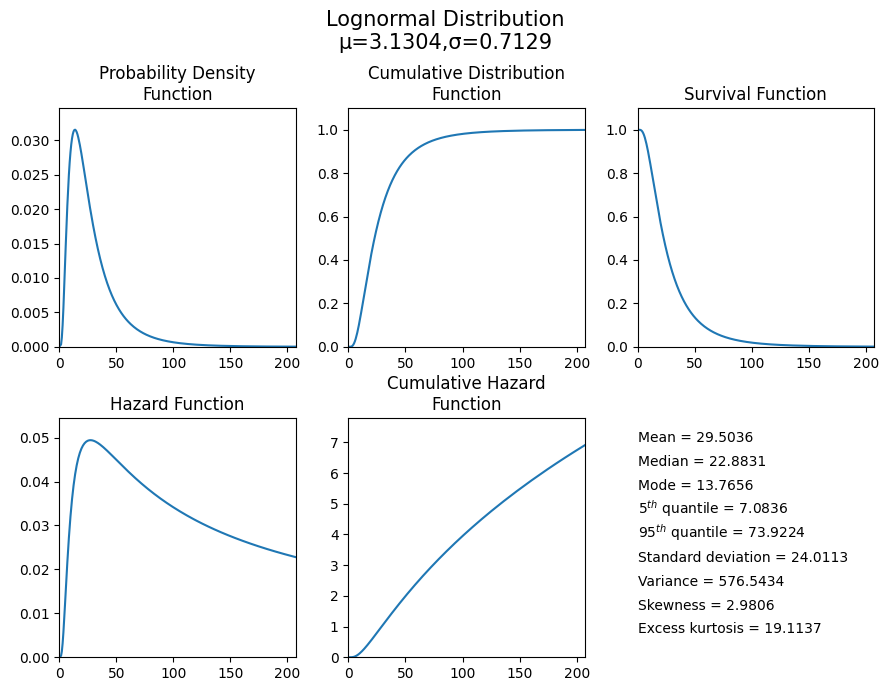

In [9]:
from reliability.Distributions import Lognormal_Distribution

dist = Lognormal_Distribution(mu=3.1304 , sigma=0.7129) 
# dist.PDF() 
# plt.show()
dist.plot()

## 📘 Loglogistic Reliability Model

The **Loglogistic distribution** is similar to the Lognormal but has heavier tails, making it useful for modeling lifetimes with a high probability of both early and late failures.


#### Parameters
- $\alpha$ = scale parameter  ($\alpha > 0$)  
- $\beta$ = shape parameter  ($\beta > 0$)  
- Limits: $t \ge 0$

#### 📈 Probability Density Function (PDF)
$
f(t) = 
\frac{\left(\frac{\beta}{\alpha}\right)\left(\frac{t}{\alpha}\right)^{\beta-1}}
{\left[1 + \left(\frac{t}{\alpha}\right)^{\beta}\right]^2}
$

#### 📊 Cumulative Distribution Function (CDF)
$
F(t) = \frac{1}{1 + \left(\frac{t}{\alpha}\right)^{-\beta}}
     = \frac{\left(\frac{t}{\alpha}\right)^{\beta}}{1 + \left(\frac{t}{\alpha}\right)^{\beta}}
     = \frac{t^{\beta}}{\alpha^{\beta} + t^{\beta}}
$

#### 🧮 Survival Function (SF)
$
R(t) = \frac{1}{1 + \left(\frac{t}{\alpha}\right)^{\beta}}
$

#### ⚙️ Hazard Function (HF)
$
h(t) = 
\frac{\left(\frac{\beta}{\alpha}\right)\left(\frac{t}{\alpha}\right)^{\beta-1}}
{1 + \left(\frac{t}{\alpha}\right)^{\beta}}
$

#### 📉 Cumulative Hazard Function (CHF)
$
H(t) = \ln\!\left[1 + \left(\frac{t}{\alpha}\right)^{\beta}\right]
$

The Loglogistic distribution is often used when the **failure rate first increases and then decreases** over time — typical of **infant mortality** followed by **wear-out** phases.

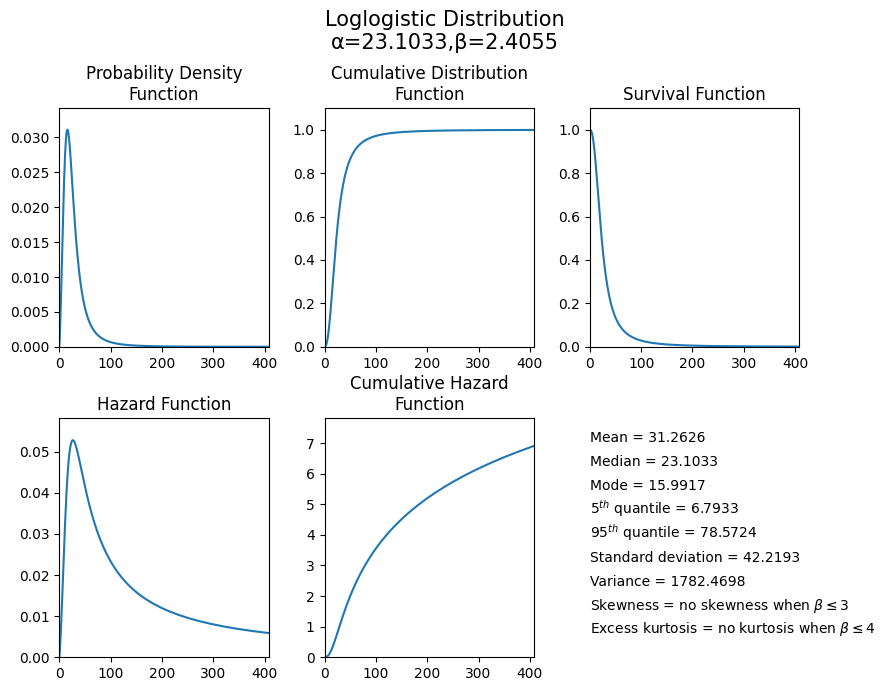

In [10]:
from reliability.Distributions import Loglogistic_Distribution

dist = Loglogistic_Distribution(alpha=23.1033, beta=2.4055) 
# dist.PDF() 
# plt.show()
dist.plot()

***
## 📘 Gamma Reliability Model

The **Gamma distribution** is a flexible model used to describe the time until the occurrence of multiple events.  
It generalizes the Exponential distribution and can represent increasing or decreasing failure rates depending on its parameters.

#### Parameters
- $\alpha$ = scale parameter ($\alpha > 0$)  
- $\beta$ = shape parameter ($\beta > 0$)  
- Limits: $t \ge 0$

#### 📈 Probability Density Function (PDF)
$
f(t) = \frac{t^{\beta - 1} e^{-t / \alpha}}{\Gamma(\beta) \, \alpha^{\beta}}
$

where $\Gamma(\beta)$ is the **complete gamma function**:

$
\Gamma(x) = \int_{0}^{\infty} t^{x - 1} e^{-t} \, dt
$

#### 📊 Cumulative Distribution Function (CDF)
$
F(t) = \frac{1}{\Gamma(\beta)} \, \gamma\!\left(\beta, \frac{t}{\alpha}\right)
$

where $\gamma(x, y)$ is the **lower incomplete gamma function**:

$
\gamma(x, y) = \int_{0}^{y} t^{x - 1} e^{-t} \, dt
$

#### 🧮 Survival Function (SF)
$
R(t) = \frac{1}{\Gamma(\beta)} \, \Gamma\!\left(\beta, \frac{t}{\alpha}\right)
$

where $\Gamma(x, y)$ is the **upper incomplete gamma function**:

$
\Gamma(x, y) = \int_{y}^{\infty} t^{x - 1} e^{-t} \, dt
$

#### ⚙️ Hazard Function (HF)
$
h(t) = \frac{t^{\beta - 1} e^{-t / \alpha}}
{\alpha^{\beta} \, R(t) \, \Gamma(\beta)}
$

#### 📉 Cumulative Hazard Function (CHF)
$
H(t) = -\ln \!\left[ \frac{1}{\Gamma(\beta)} \, \Gamma\!\left(\beta, \frac{t}{\alpha}\right) \right]
$

#### 🧠 Interpretation
- When $\beta = 1$, the Gamma distribution reduces to the **Exponential** distribution.  
- For $\beta > 1$, the failure rate **increases** over time (wear-out behavior).  
- For $\beta < 1$, the failure rate **decreases** over time (early-life failures).  
- The **scale parameter** $\alpha$ stretches or compresses the time axis.

> Note: Some implementations use the **rate parameter** $1 / \alpha$ instead of $\alpha$.

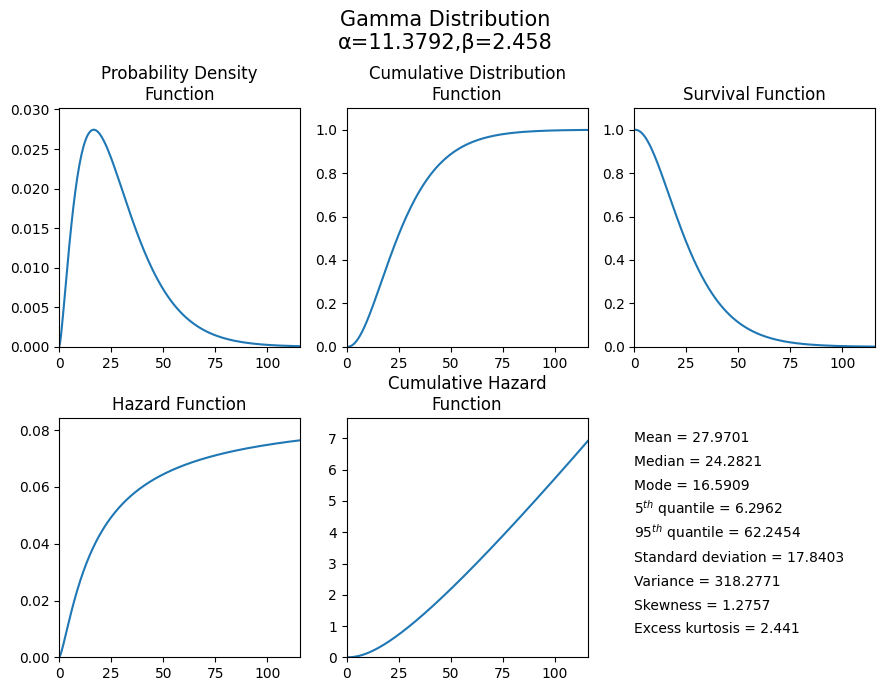

In [12]:
from reliability.Distributions import Gamma_Distribution

dist = Gamma_Distribution(alpha=11.3792, beta=2.458) 
# dist.PDF() 
# plt.show()
dist.plot()

***
## 📘 Normal Reliability Model

The **Normal distribution** (also called the *Gaussian distribution*) is one of the most fundamental continuous probability distributions.  
It describes random variables that cluster around a mean value, with symmetric variability on both sides.

#### Parameters
- $\mu$ = location (mean) parameter ($-\infty < \mu < \infty$)  
- $\sigma$ = scale (standard deviation) parameter ($\sigma > 0$)  
- Limits: $-\infty < t < \infty$

#### 📈 Probability Density Function (PDF)
$
f(t) = \frac{1}{\sigma \sqrt{2\pi}} 
\exp\!\left[-\frac{1}{2}\left(\frac{t - \mu}{\sigma}\right)^2\right]
$

or equivalently,

$
f(t) = \frac{1}{\sigma} \, \phi\!\left(\frac{t - \mu}{\sigma}\right)
$

where $\phi$ is the **standard normal PDF** with $\mu = 0$ and $\sigma = 1$.

#### 📊 Cumulative Distribution Function (CDF)
$
F(t) = \Phi\!\left(\frac{t - \mu}{\sigma}\right)
$

where $\Phi$ is the **standard normal CDF**.

#### 🧮 Survival Function (SF)
$
R(t) = 1 - \Phi\!\left(\frac{t - \mu}{\sigma}\right)
      = \Phi\!\left(\frac{\mu - t}{\sigma}\right)
$

#### ⚙️ Hazard Function (HF)
$
h(t) = 
\frac{\phi\!\left(\frac{t - \mu}{\sigma}\right)}
{\sigma \, \Phi\!\left(\frac{\mu - t}{\sigma}\right)}
$

#### 📉 Cumulative Hazard Function (CHF)
$
H(t) = -\ln\!\left[\Phi\!\left(\frac{\mu - t}{\sigma}\right)\right]
$

#### 🧠 Interpretation
- The Normal distribution is **symmetric** around $\mu$; it models random variation with no skew.  
- About 68% of values fall within $\pm 1\sigma$ of the mean, 95% within $\pm 2\sigma$, and 99.7% within $\pm 3\sigma$.  
- It is often used as a baseline model for **measurement errors**, **process variation**, and **Gaussian noise**.

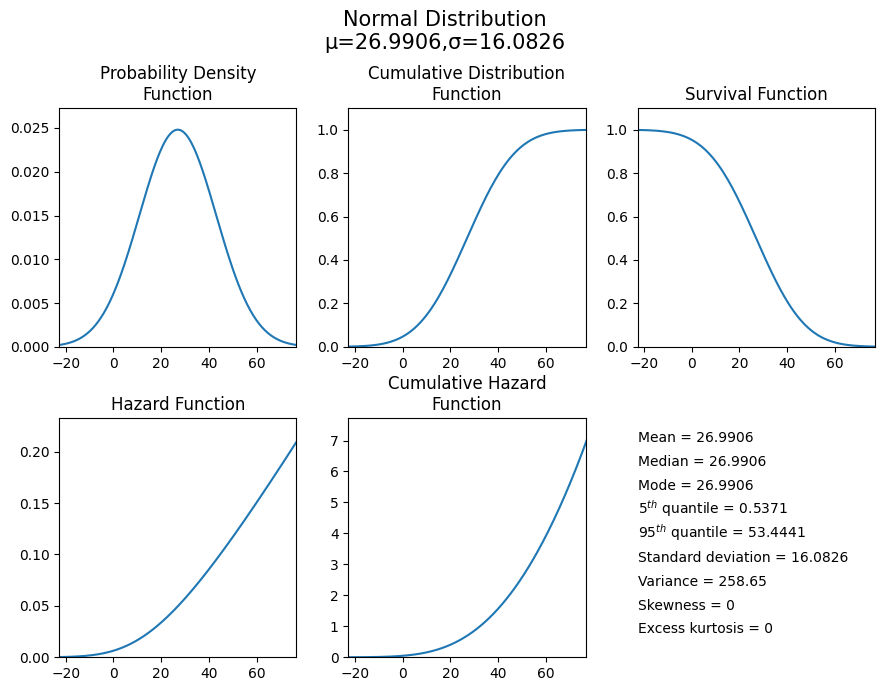

In [13]:
from reliability.Distributions import Normal_Distribution

dist = Normal_Distribution(mu=26.9906, sigma=16.0826) 
# dist.PDF() 
# plt.show()
dist.plot()

***
## 📘 Gumbel Reliability Model

The **Gumbel distribution** (also known as the **Smallest Extreme Value (SEV)** distribution) is commonly used to model the distribution of the minimum or maximum of a sample of random variables — particularly in reliability and extreme value analysis.

#### Parameters
- $\mu$ = location parameter ($-\infty < \mu < \infty$)  
- $\sigma$ = scale parameter ($\sigma > 0$)  
- Limits: $-\infty < t < \infty$

#### 📈 Probability Density Function (PDF)
$
f(t) = \frac{1}{\sigma} 
e^{z - e^{z}}
$

where 

$
z = \frac{t - \mu}{\sigma}
$

#### 📊 Cumulative Distribution Function (CDF)
$
F(t) = 1 - e^{-e^{z}}
$

#### 🧮 Survival Function (SF)
$
R(t) = e^{-e^{z}}
$

#### ⚙️ Hazard Function (HF)
$
h(t) = \frac{e^{z}}{\sigma}
$

#### 📉 Cumulative Hazard Function (CHF)
$
H(t) = e^{z}
$

#### 🧠 Interpretation
- The Gumbel distribution is a **special case of the Extreme Value distributions**, often used for modeling **extreme minima or maxima** (e.g., weakest link or largest stress).  
- The **location parameter** $\mu$ shifts the distribution along the time axis.  
- The **scale parameter** $\sigma$ controls the spread — smaller $\sigma$ gives a steeper curve.  
- This form corresponds to the **Smallest Extreme Value (SEV)** type. The **Largest Extreme Value (LEV)** form is obtained by flipping the sign of $z$.

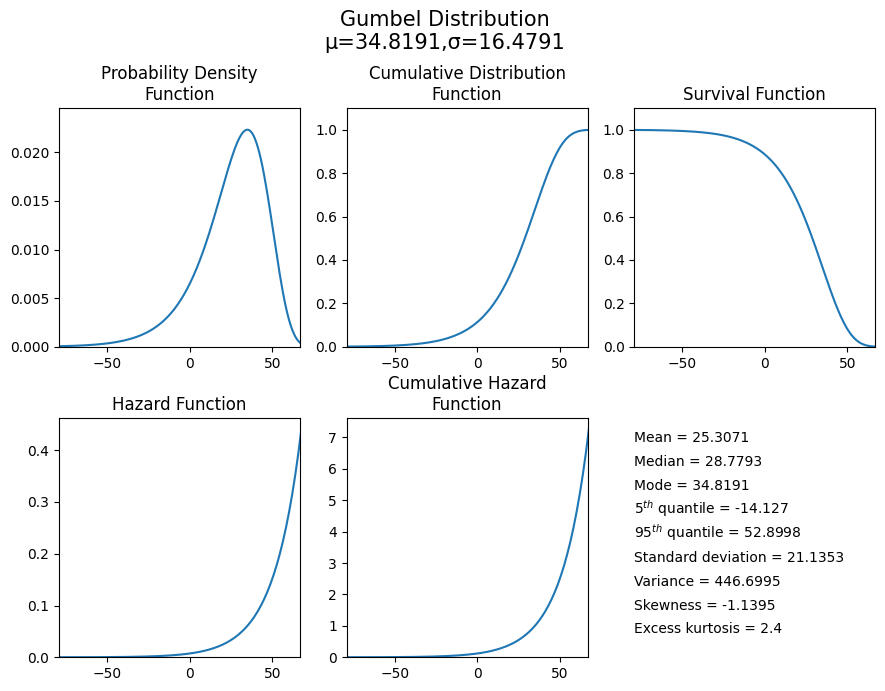

In [14]:
from reliability.Distributions import Gumbel_Distribution

dist = Gumbel_Distribution(mu=34.8191, sigma=16.4791) 
# dist.PDF() 
# plt.show()
dist.plot()